# Stage 5

<br>

<font color=red>**최종 학습 목표**</font>

* 신용카드 사기거래 탐지 프로젝트를 통해 여러분은 이상치 감지를 훌륭히 수행할 수 있는 데이커가 되는 것에 한 발짝 더 다가가게 될 것입니다.

* 이 뿐만 아니라 이번 교육을 통해 키운 역량은 다른 곳에서도 큰 도움이 될 것이라 기대합니다.<br>

<br><font color=red>**Stage 5 학습 목표**</font>

* 히스토그램과 박스 플랏으로 데이터 분포와 이상치 여부를 확인한다.

* 산점도를 통해 상관관계를 확인한다.

* 시각화를 통해 전처리 및 특징 공학에 필요한 Insight를 발견한다.


<br>

# Intro

<br>

**데이커 여러분 환영합니다.** 🤗 

지난 Stage 4에서는 시각화를 통해 데이터의 비교, 분포, 구성, 관계를 확인하는 방법에 대해 배워보았습니다.
<br><br>
이번 Stage 5에서는 실제 데이콘에서 개최한 대회의 데이터를 시각화하여, 머신러닝 엔지니어링 성과를 높일 수 있는 **Insight 발견**에 대해 알아볼 것입니다.
<br><br>
오늘 우리는 다양한 그래프를 통해 <font color=blue>**데이터의 특징 별 패턴**</font>, <font color=red>**정상 거래와 사기 거래 데이터 비교**</font>, <font color=green>**데이터 셋 별 데이터 분포 확인**</font>,  <font color=#A52A2A>**적절한 전처리 및 특징 공학을 고려하기**</font>에 관하여 실습과 퀴즈를 통해 공부하게 될 것입니다.

퀴즈가 있다고 당황하지 마세요. <font color=red>**Hint**</font>가 여러분을 언제나 곁에서 도와줄 것입니다. 
<br><br>
그럼 이제 고고씽 ~ ! 🚅<br><br>

# 2. Stage 5에 앞서 대회 규칙 설명

<br>

<br>

# 3. Let's Start

<br>

여러분은 다시 중대한 임무를 맡게되었습니다. ⭐️

다양한 시각화 기법을 적용하여 <font color=blue>**Insight 발견**</font>을 잘하기 위해 차근차근 배워봅시다.

## 3 - 1 대회에서 제공하는 데이터 셋 불러오기

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./train.csv') # 훈련 데이터 셋
val = pd.read_csv('./val.csv') # 검증 데이터 셋
test = pd.read_csv('./test.csv') # 테스트 데이터 셋

# 3 - 2 데이터 셋 별 기본 정보 확인하기

**데이터 앞부분 살펴보기**

In [3]:
display(train.head(),
        val.head(),
        test.head())

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


**데이터의 수 및 칼럼 개수 확인하기**

In [4]:
print(train.shape,
      val.shape,
      test.shape)

(113842, 31) (28462, 32) (142503, 31)


**결측치 확인하기**

In [5]:
print(train.isnull().sum().sum(),
      val.isnull().sum().sum(),
      test.isnull().sum().sum())

0 0 0


**데이터 셋 통계값 확인하기**

In [6]:
display(train.drop(columns='ID').describe(),
        val.drop(columns=['ID', 'Class']).describe())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,-0.002299,...,0.000013,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916
std,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,1.084560,...,0.700859,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246
min,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,-22.187089,...,-14.004410,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878
25%,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,-0.540463,...,-0.226196,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884
50%,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,-0.099386,...,-0.029430,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156
75%,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,0.452763,...,0.186905,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828
max,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,12.161890,...,22.599543,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975


**검증 데이터 셋 라벨 수 비교하기**

In [7]:
cond = (val['Class']==0)

val.loc[cond, 'Class'] = 'Normal'
val.loc[~cond, 'Class'] = 'Anomaly'

print(val['Class'].value_counts())

Normal     28432
Anomaly       30
Name: Class, dtype: int64


## 3 - 2 데이터 셋 별 시각화

### 3 - 2 -1 Train 데이터 셋 시각화

#### 각 칼럼 별 통계값 출력하기

In [8]:
def print_statistics_1(data, col):

  max = data[col].max()
  min = data[col].min()
  mean = data[col].mean()
  median = data[col].median()
  std = data[col].std()

  print(f'\n{col}의 최대값 : {max}')
  print(f'{col}의 최소값 : {min}')
  print(f'{col}의 평균값 : {mean}')
  print(f'{col}의 중앙값 : {median}')
  print(f'{col}의 표준편차 : {std}\n')

In [9]:
print_statistics_1(train, 'V1')


V1의 최대값 : 2.45492999121121
V1의 최소값 : -56.407509631329
V1의 평균값 : 0.00019729098661136333
V1의 중앙값 : 0.01207362136827825
V1의 표준편차 : 1.9510604522492707



#### 상관 관계를 나타내주는 Heat Map 시각화

In [28]:
# 각 칼럼 별 상관 계수가 한 눈에 들어오지 않습니다.
display(train.corr().head(10))

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
ID,1.000000,0.112910,0.000845,-0.414916,-0.100227,0.171102,-0.061731,0.081595,-0.034201,-0.002427,...,0.042039,0.134033,0.050219,-0.013915,-0.225939,-0.039474,-0.003649,-0.007565,-0.017644,0.993388
V1,0.112910,1.000000,0.015507,-0.015559,0.005334,-0.009902,-0.000177,-0.021839,0.003626,-0.009599,...,0.000829,-0.001097,0.017551,-0.001289,0.002329,-0.002013,0.004085,-0.044459,-0.231744,0.118519
V2,0.000845,0.015507,1.000000,0.015350,-0.004632,0.005220,0.004119,0.020025,0.002628,0.001865,...,0.010194,0.003269,0.015923,-0.004967,-0.003145,0.000796,0.005265,-0.056137,-0.530737,-0.008336
V3,-0.414916,-0.015559,0.015350,1.000000,0.014562,-0.021869,-0.000392,-0.023424,0.002836,-0.017386,...,-0.001319,0.004616,0.001575,0.003254,0.000031,0.000671,0.003680,-0.022925,-0.207185,-0.429787
V4,-0.100227,0.005334,-0.004632,0.014562,1.000000,0.009886,0.001191,0.011269,0.000271,0.008993,...,-0.000008,-0.002732,-0.004866,0.001741,0.001838,0.002832,-0.007131,0.025828,0.091913,-0.103017
V5,0.171102,-0.009902,0.005220,-0.021869,0.009886,1.000000,-0.000701,-0.012571,-0.000730,-0.006367,...,-0.013559,0.004033,-0.009856,0.004302,-0.001611,-0.000664,0.020649,-0.004484,-0.382747,0.175038
V6,-0.061731,-0.000177,0.004119,-0.000392,0.001191,-0.000701,1.000000,-0.010017,0.008153,-0.004149,...,0.006419,-0.004982,0.004990,-0.001185,-0.000470,-0.003615,-0.011486,0.000046,0.210381,-0.061977
V7,0.081595,-0.021839,0.020025,-0.023424,0.011269,-0.012571,-0.010017,1.000000,0.000813,-0.009075,...,0.008721,-0.000123,0.011034,-0.001084,0.000420,0.004651,-0.033952,0.006749,0.391239,0.084646
V8,-0.034201,0.003626,0.002628,0.002836,0.000271,-0.000730,0.008153,0.000813,1.000000,-0.003052,...,0.001672,0.000508,0.013885,0.000094,-0.003231,0.003217,-0.006134,-0.014922,-0.102777,-0.036350
V9,-0.002427,-0.009599,0.001865,-0.017386,0.008993,-0.006367,-0.004149,-0.009075,-0.003052,1.000000,...,-0.007212,-0.002725,-0.008715,0.002114,-0.001449,0.001348,-0.001733,0.008454,-0.041503,-0.007580


In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# 상관 관계를 Heat Map으로 시각화합니다.

def Heat_Map(data, # 사용할 데이터 셋
             drop_columns, # 제거할 칼럼
             data_name # 이미지 제목으로 설정한 데이터 셋 이름
             ):

  # 불필요한 칼럼을 제거합니다.
  data = data.drop(columns=drop_columns)

  # 도화지의 크기를 설정합니다.
  fig, ax = plt.subplots(figsize=(16, 10))

  # 상관계수 값을 Heat Map으로 시각화합니다.
  plt.pcolor(data.corr())

  # X축와 Y축을 설정합니다.
  plt.xticks(np.arange(0.5, len(data.columns), 1), data.columns)
  plt.yticks(np.arange(0.5, len(data.columns), 1), data.columns)

  # Heat Map 색깔의 의미를 나타내는 막대를 표기합니다.
  plt.colorbar()

  # 시각화한 이미지의 제목을 설정합니다.
  ax.set_title(f"{data_name} Heat Map")

  plt.show()

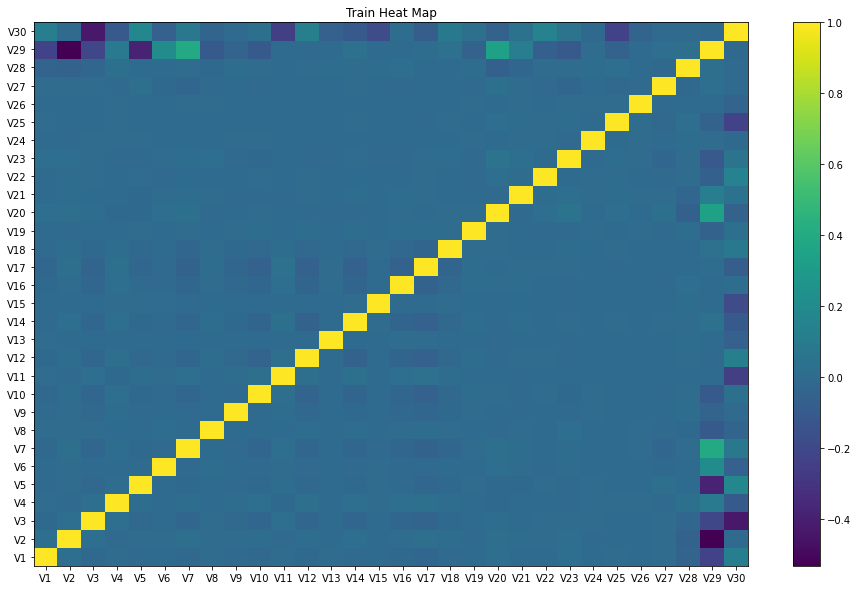

In [32]:
Heat_Map(data=train,
         drop_columns=['ID'],
         data_name='Train')

유의미한 상관 관계를 보이는 칼럼은 보이지 않습니다.

그래도 상대적으로 유의미한 상관 관계를 나타내는 칼럼을 자세히 살펴봅시다.

#### 산점도를 통한 양의 상관관계를 칼럼들을 시각화

In [48]:
# 두 칼럼을 통해 산점도로 시각화합니다.

def scatter_plot(data, # 사용할 데이터 셋
                 x, # X축에 표기할 칼럼
                 y, # Y축에 표기할 칼럼
                 hue # 'Class' 칼럼을 표기할 여부
                 ):

  # 두 칼럼 간의 상관 관계를 출력합니다.
  corr = np.corrcoef(data[x], data[y])[0, 1]
  print(f'\n상관계수 : {corr}\n')
  
   # 'Class' 칼럼을 표기하지 않을 경우
  if hue == False:

    # 도화지 크기를 설정합니다.
    fig, ax = plt.subplots(figsize=(10, 6))
  
    # 두 칼럼의 관계를 산점도로 표현합니다.
    plt.scatter(x=data[x], y=data[y])

    # 그래프의 제목을 설정합니다.
    ax.set_title(f"{x} & {y} Scatter")

  # 'Class' 칼럼을 표기할 경우
  if hue == True:
    
    # 도화지 크기를 설정합니다.
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Class 별 색상을 설정합니다.
    color = {'Anomaly':'red', 'Normal':'blue'}
    
    # 두 칼럼의 관계를 산점도로 표현합니다.
    ax.scatter(data[x], data[y], c=data['Class'].map(color))

    # 그래프의 제목을 설정합니다.
    ax.set_title(f"{x} & {y} Scatter")

  plt.show()


상관계수 : 0.39123942177039084



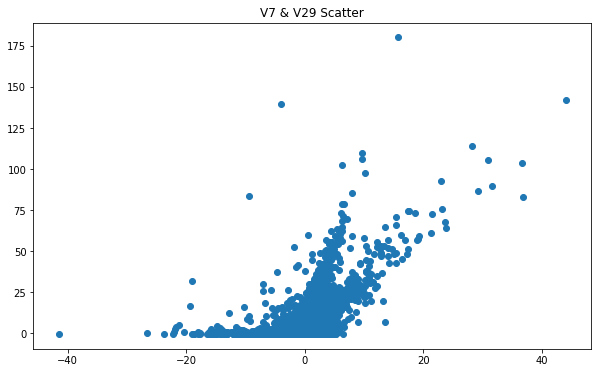

In [49]:
# V7 & V29
scatter_plot(data=train, x='V7', y='V29', hue=False)


상관계수 : 0.3482192636898068



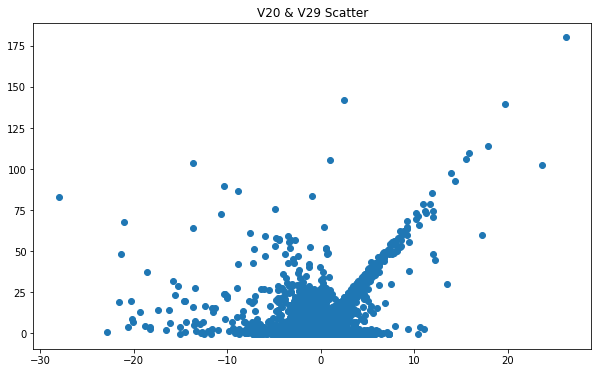

In [50]:
# V20 & V29
scatter_plot(data=train, x='V20', y='V29', hue=False)

#### 산점도를 통한 음의 상관관계를 칼럼들을 시각화


상관계수 : -0.5307373283987076



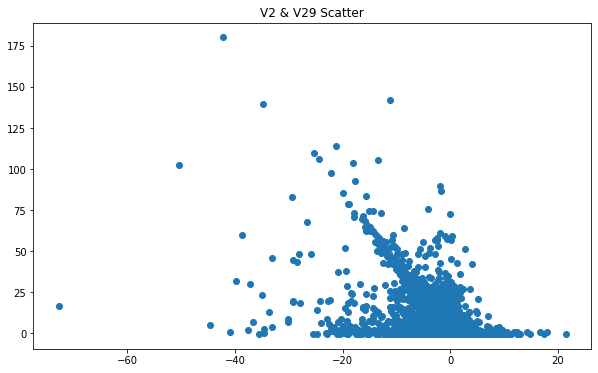

In [51]:
# V2 & V29
scatter_plot(data=train, x='V2', y='V29', hue=False)


상관계수 : -0.4297866482472341



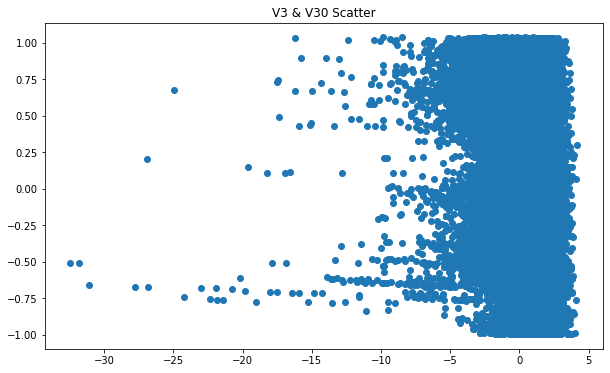

In [52]:
# V3 & V30
scatter_plot(data=train, x='V3', y='V30', hue=False)


상관계수 : -0.38274706592548874



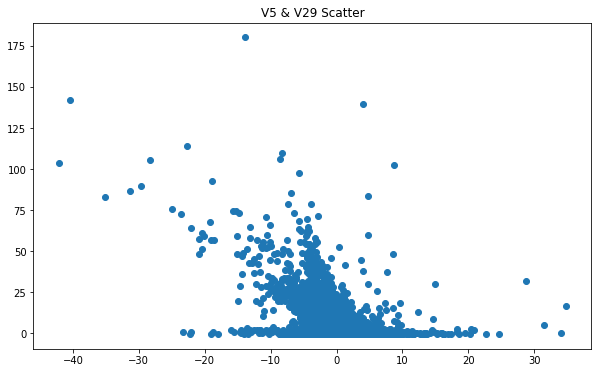

In [53]:
# V5 & V29
scatter_plot(data=train, x='V5', y='V29', hue=False)

**약한 상관 관계를 보이기에 두 칼럼 간 일정한 패턴이 있다는 것을 확인하는 것은 어려웠습니다.**<br><br>

**그러나 두 칼럼 간의 데이터 특정 한 부분을 중심으로 모여있는 것을 확인할 수 있습니다.**<br><br>

**우리는 정상 거래는 특정 한 부분에 모여있을 것이고 사기 거래는 특정 한 부분으로 부터 멀리 떨어져 있을 것이라고 가정할 수 있습니다.**<br><br>

#### 히스토그램과 박스 플랏을 통한 데이터 분포 확인하기

In [72]:
# 각 칼럼 별 히스토그램과 박스 플랏 시각화 

def EDA_Data_Set_1(data, # 사용할 데이터 셋
                   drop_columns # 사용하지 않을 칼럼
                   ):

  # 데이터 셋의 각각의 칼럼을 불러옵니다.
  for col in data.drop(columns=drop_columns).columns:

    # 각 칼럼의 통계값을 출력합니다.
    print_statistics_1(data, col)

    # 두 개의 도화지를 준비합니다.
    fig, ax = plt.subplots(ncols=2, figsize=(15, 3))

    # 히스토그램을 표현합니다.
    ax[0].hist(x=data[col], bins=100)
    ax[0].set_title(f"{col}'s Histogram")

    # 박스 플랏을 표현합니다.
    ax[1].boxplot(x=data[col], vert=False)
    ax[1].set_title(f"{col}'s Box Plot")

    plt.show()


V1의 최대값 : 2.45492999121121
V1의 최소값 : -56.407509631329
V1의 평균값 : 0.00019729098661136333
V1의 중앙값 : 0.01207362136827825
V1의 표준편차 : 1.9510604522492707



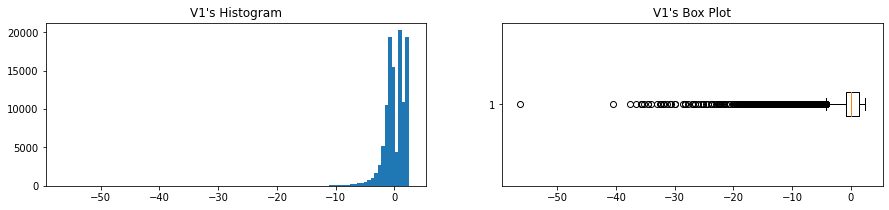


V2의 최대값 : 21.4672029942752
V2의 최소값 : -72.7157275629303
V2의 평균값 : 0.0012887947752847964
V2의 중앙값 : 0.06639026082044969
V2의 표준편차 : 1.6510635788198469



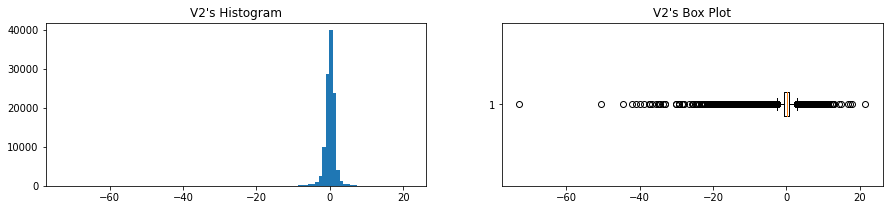


V3의 최대값 : 4.18781059904763
V3의 최소값 : -32.4541981862547
V3의 평균값 : 0.009717362937767754
V3의 중앙값 : 0.183867815323936
V3의 표준편차 : 1.4969157270583686



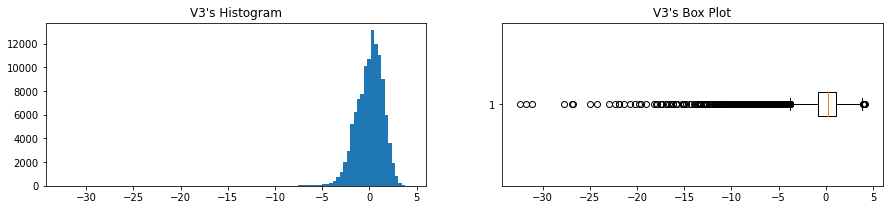


V4의 최대값 : 16.4912171736623
V4의 최소값 : -5.6006071412151
V4의 평균값 : -0.004169208277632673
V4의 중앙값 : -0.019359487922923302
V4의 표준편차 : 1.412633171594734



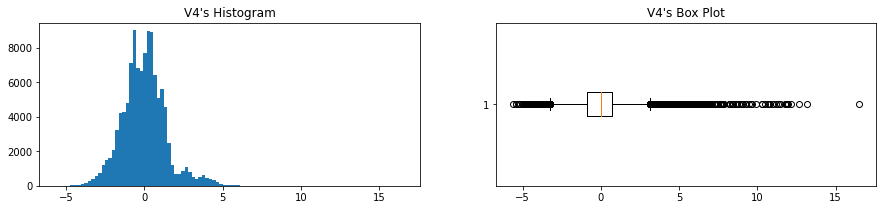


V5의 최대값 : 34.8016658766686
V5의 최소값 : -42.1478983728015
V5의 평균값 : 0.00047499618187236547
V5의 중앙값 : -0.054059608935735054
V5의 표준편차 : 1.367533486735317



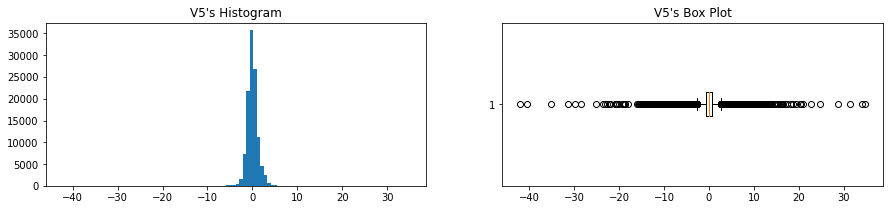


V6의 최대값 : 23.9178371266367
V6의 최소값 : -26.1605059358433
V6의 평균값 : 0.005141157690735944
V6의 중앙값 : -0.272435589201947
V6의 표준편차 : 1.3305827734281754



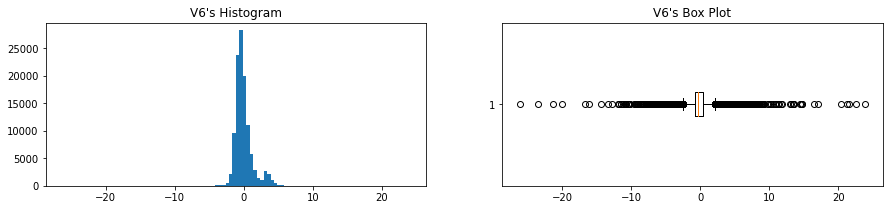


V7의 최대값 : 44.0544613631638
V7의 최소값 : -41.5067960832574
V7의 평균값 : 0.0057690238842603115
V7의 중앙값 : 0.039036187676720846
V7의 표준편차 : 1.2041108132981733



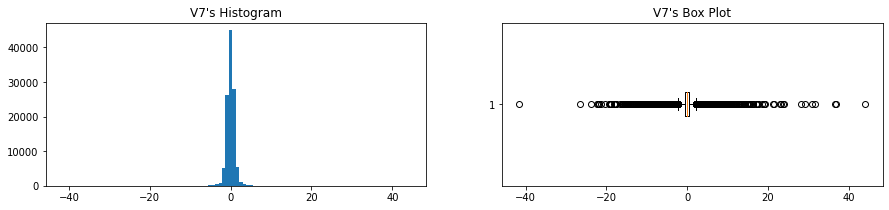


V8의 최대값 : 20.0072083651213
V8의 최소값 : -50.9433688677023
V8의 평균값 : -0.0024505883004975835
V8의 중앙값 : 0.0209696520444015
V8의 표준편차 : 1.1855042538309344



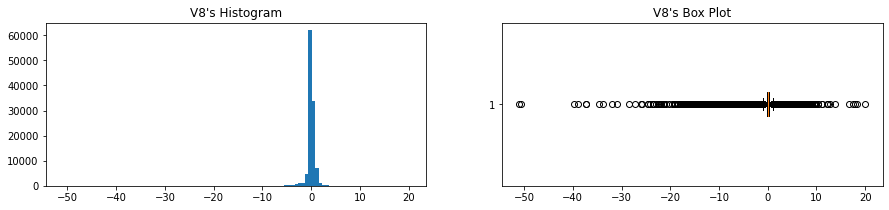


V9의 최대값 : 10.3928888246785
V9의 최소값 : -13.4340663182301
V9의 평균값 : -0.002107068687996854
V9의 중앙값 : -0.0521569296307329
V9의 표준편차 : 1.0954151622035642



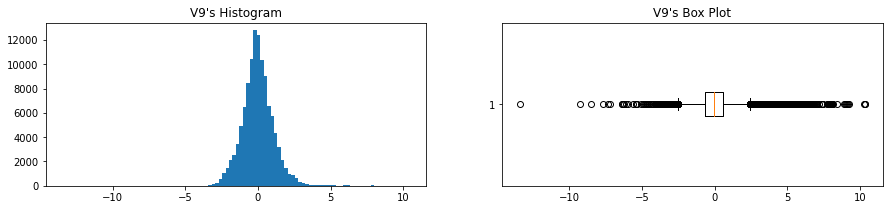


V10의 최대값 : 15.3317415557881
V10의 최소값 : -24.4031849699728
V10의 평균값 : 0.005209412662028898
V10의 중앙값 : -0.0908096855072013
V10의 표준편차 : 1.0713372717719878



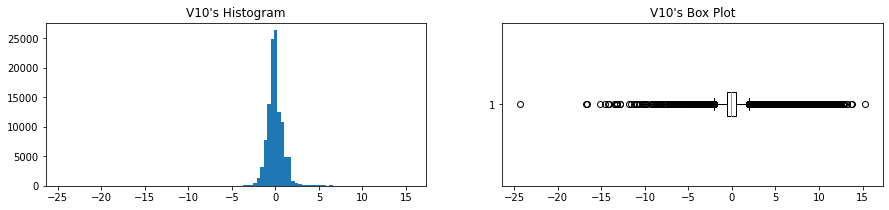


V11의 최대값 : 10.446846814514
V11의 최소값 : -4.68293054765276
V11의 평균값 : -0.0016864005258888273
V11의 중앙값 : -0.03440545072255165
V11의 표준편차 : 1.01468861204786



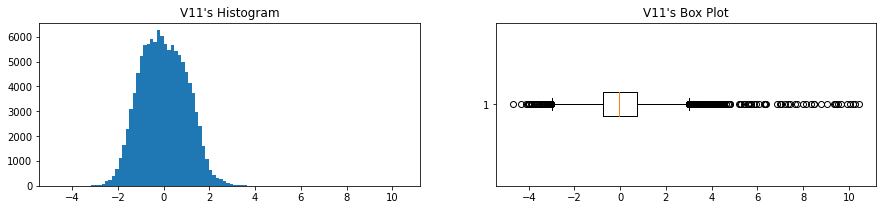


V12의 최대값 : 4.31807083997779
V12의 최소값 : -18.5536970096458
V12의 평균값 : 0.003944336708458373
V12의 중앙값 : 0.14143396998729552
V12의 표준편차 : 0.9770393721889566



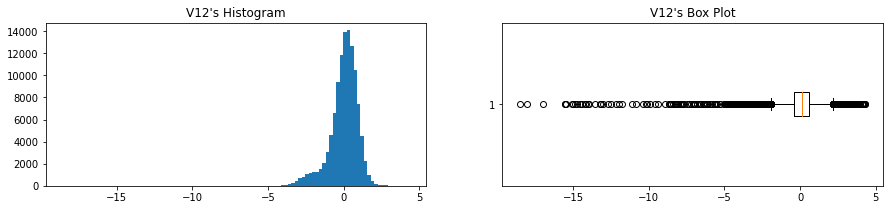


V13의 최대값 : 4.56900895856606
V13의 최소값 : -3.84497361209561
V13의 평균값 : 0.0020432913532953444
V13의 중앙값 : -0.010846694558323149
V13의 표준편차 : 0.9949080604768155



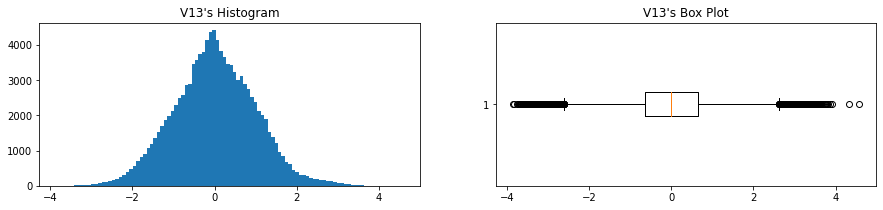


V14의 최대값 : 7.51840278124594
V14의 최소값 : -15.6231873302985
V14의 평균값 : 0.004397322699922775
V14의 중앙값 : 0.0521569486240506
V14의 표준편차 : 0.9337533293727834



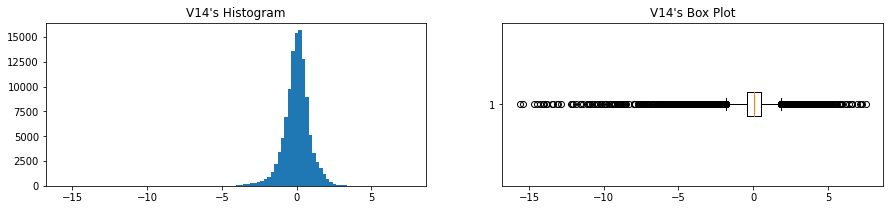


V15의 최대값 : 5.78451388962946
V15의 최소값 : -4.15253175950472
V15의 평균값 : -0.0005004147332574053
V15의 중앙값 : 0.048524452221400144
V15의 표준편차 : 0.9156656449739775



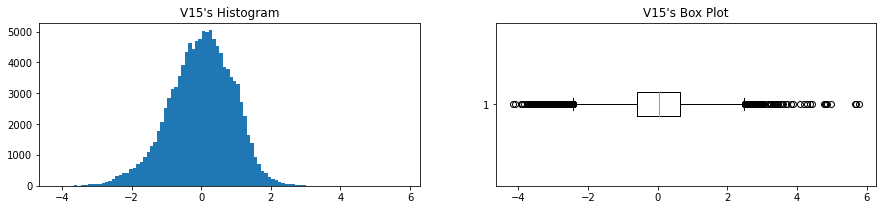


V16의 최대값 : 8.28988955954619
V16의 최소값 : -13.30388757707
V16의 평균값 : 0.002905432082529999
V16의 중앙값 : 0.0664341250021616
V16의 표준편차 : 0.8649033262281823



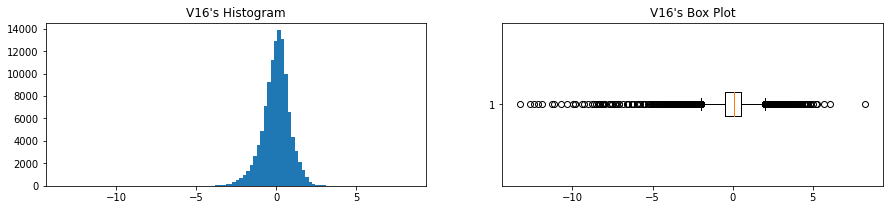


V17의 최대값 : 9.25352625047285
V17의 최소값 : -21.2979057823155
V17의 평균값 : 0.003397329184032439
V17의 중앙값 : -0.06693894995534486
V17의 표준편차 : 0.80855207696864



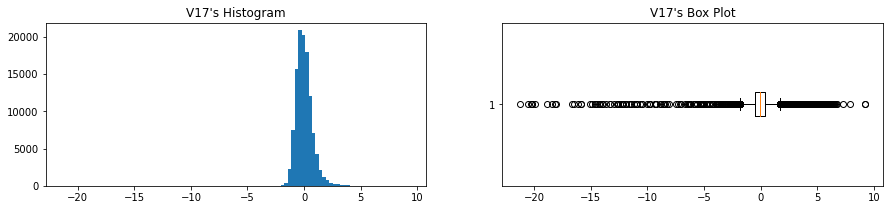


V18의 최대값 : 4.2956482344645
V18의 최소값 : -8.66881519685045
V18의 평균값 : 0.0011144019564926022
V18의 중앙값 : -0.0046325153441596
V18의 표준편차 : 0.8307631372452877



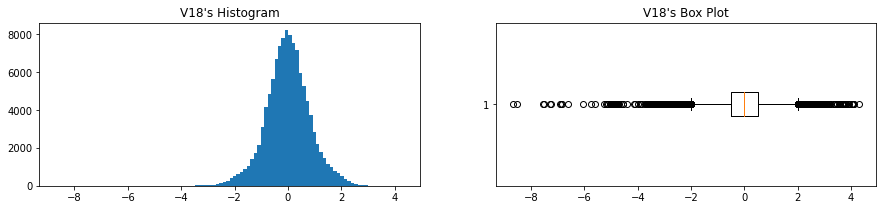


V19의 최대값 : 4.71514167078375
V19의 최소값 : -4.93273305547833
V19의 평균값 : 0.0003000597969664966
V19의 중앙값 : 0.00465697882936915
V19의 표준편차 : 0.8145423008581303



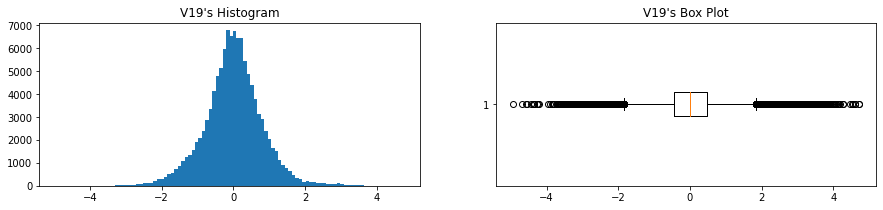


V20의 최대값 : 26.2373907895659
V20의 최소값 : -28.009635333749
V20의 평균값 : -0.0004995680282647515
V20의 중앙값 : -0.0628905006924982
V20의 표준편차 : 0.7633262147916938



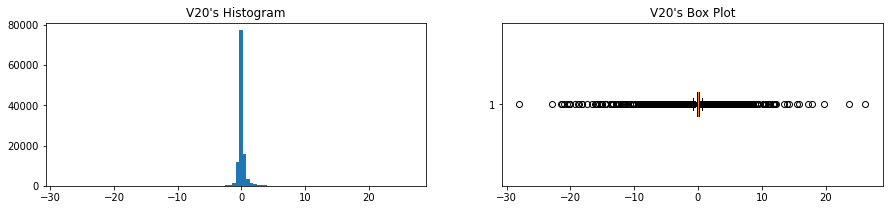


V21의 최대값 : 27.2028391573154
V21의 최소값 : -22.7575398590576
V21의 평균값 : -0.0012424691313204178
V21의 중앙값 : -0.030281477600194097
V21의 표준편차 : 0.7220012926392156



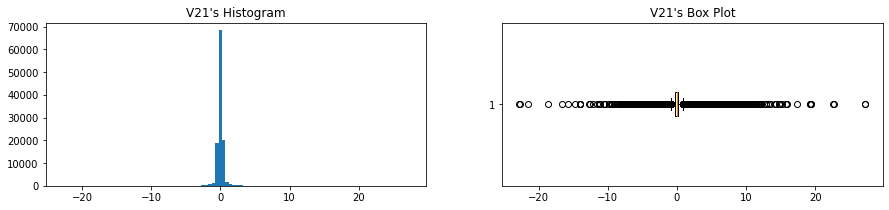


V22의 최대값 : 8.36198519168435
V22의 최소값 : -8.88701714094871
V22의 평균값 : 4.0883465609378427e-07
V22의 중앙값 : 0.00834580698293555
V22의 표준편차 : 0.723829061858326



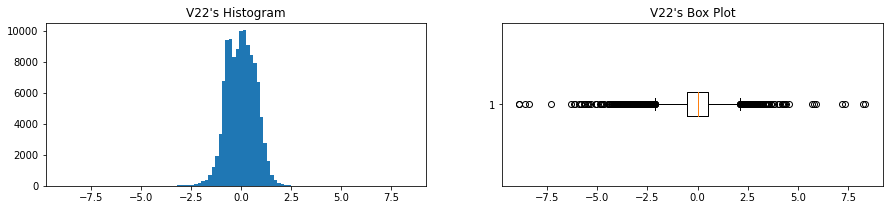


V23의 최대값 : 22.5284116897749
V23의 최소값 : -44.8077352037913
V23의 평균값 : -0.0013174176267935621
V23의 중앙값 : -0.012260984700957801
V23의 표준편차 : 0.6360608348896047



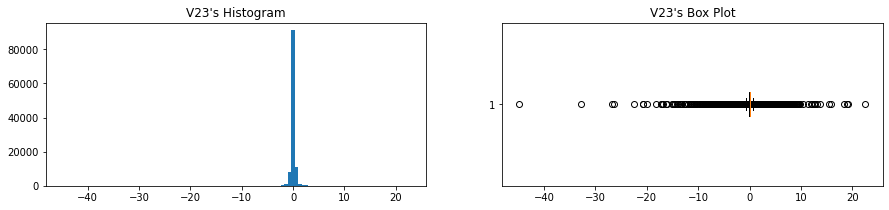


V24의 최대값 : 4.02286589044732
V24의 최소값 : -2.82484890293617
V24의 평균값 : -0.0008841493522409324
V24의 중앙값 : 0.04057349018340555
V24의 표준편차 : 0.6058543652030749



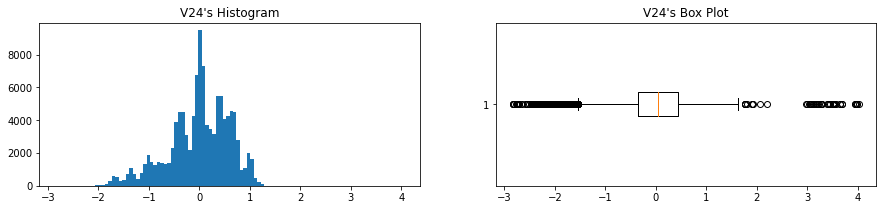


V25의 최대값 : 7.51958867870916
V25의 최소값 : -10.2953970749851
V25의 평균값 : 0.001680153622333995
V25의 중앙값 : 0.018278021175428
V25의 표준편차 : 0.5200694419728161



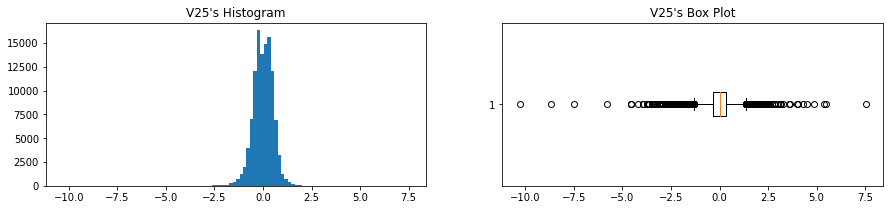


V26의 최대값 : 3.11929452903772
V26의 최소값 : -1.8553553377608
V26의 평균값 : -0.00029337012564088164
V26의 중앙값 : -0.052815375709404755
V26의 표준편차 : 0.48097857889866485



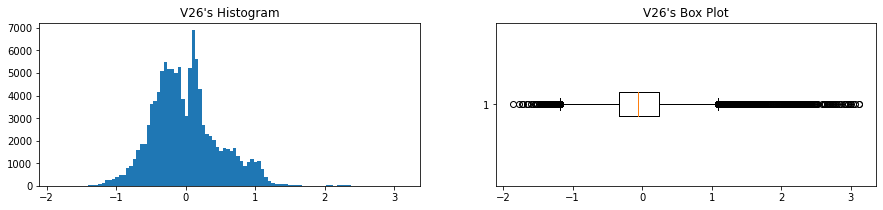


V27의 최대값 : 11.1357398445742
V27의 최소값 : -9.89524404755692
V27의 평균값 : -0.00023371284253036214
V27의 중앙값 : 0.00150188492327435
V27의 표준편차 : 0.39950548833452487



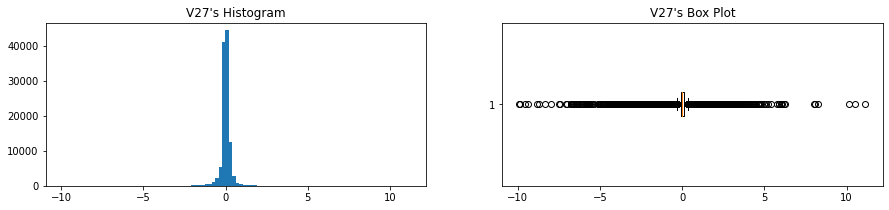


V28의 최대값 : 33.8478078188831
V28의 최소값 : -9.61791545238239
V28의 평균값 : -0.0005080545516753246
V28의 중앙값 : 0.011158211260897648
V28의 표준편차 : 0.3561296472138799



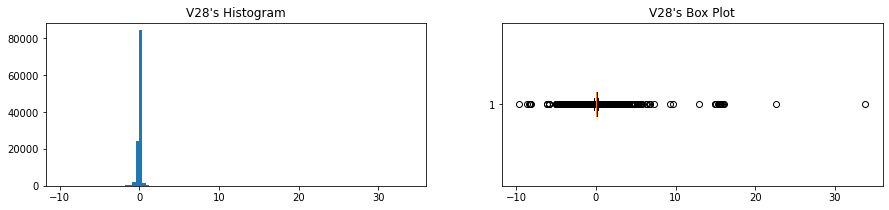


V29의 최대값 : 180.10102703835676
V29의 최소값 : -0.3074128414727869
V29의 평균값 : 0.9272530174662471
V29의 중앙값 : -0.0006986655488017
V29의 표준편차 : 3.4129328932881196



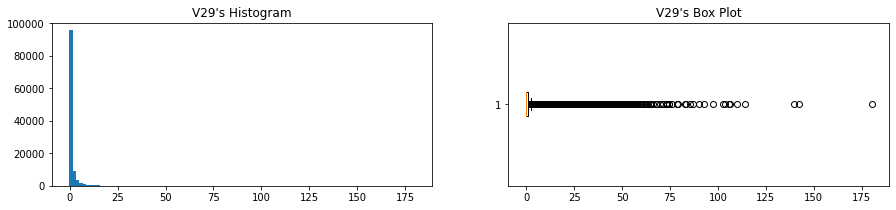


V30의 최대값 : 1.0349510685040944
V30의 최소값 : -0.9949717454387388
V30의 평균값 : 0.11623154312648176
V30의 중앙값 : -0.00259049095971515
V30의 표준편차 : 0.558160863013255



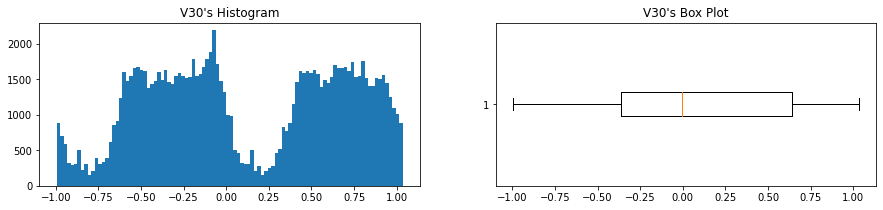

In [73]:
EDA_Data_Set_1(data=train, drop_columns=['ID'])

**대부분의 칼럼에서 0을 중심으로 모여있으며 각기 다른 이상값을 가지고 있음을 확인할 수 있습니다.**<br><br>

**실제로 평균값과 중앙값 차이가 큰 칼럼이 있으며, 최대값과 최소값이 중심으로 크게 떨어져 있음을 확인할 수 있습니다.**<br><br>

**표준편차는 상대적으로 적은 것으로 보아 이상치인 데이터는 극소수 인 것으로 추정됩니다.**<br><br>